## Text Analysis(Sentiment analysis & Topic Modeling)

Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
from nltk.util import ngrams
import re

Datasets for NLTK

In [2]:
nltk.download('punkt')  # Download the tokenization data
nltk.download('stopwords')  # Download the stopwords data
nltk.download('averaged_perceptron_tagger')  # Download the part-of-speech tagging data
nltk.download('maxent_ne_chunker')  # Download the named entity recognition data
nltk.download('words')  # Download the words corpus

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abraham.shimelis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abraham.shimelis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abraham.shimelis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\abraham.shimelis\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\abraham.shimelis\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Load the CSV file into a pandas DataFrame

In [3]:
file_path = '../data/raw_analyst_ratings.csv'
# file_path = '../data/new-data.csv'
df = pd.read_csv(file_path)

### Sentiment Analysis

Define a function to perform sentiment analysis on headlines

In [4]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

Apply the sentiment analysis function to the 'headline' column

In [5]:
df['sentiment'] = df['headline'].apply(get_sentiment)

Print or visualize the results

sentiment
Neutral     934928
Positive    341161
Negative    131239
Name: count, dtype: int64


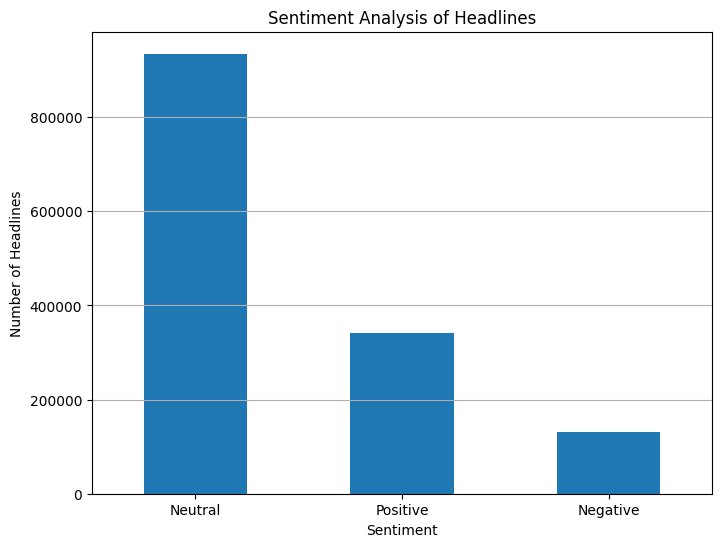

In [6]:
sentiment_counts = df['sentiment'].value_counts()

# Print the sentiment counts
print(sentiment_counts)

# Optionally, plot a bar chart of sentiment counts
sentiment_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Sentiment Analysis of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Most Common Keywords/Phrases of News Headlines Analysis

Keyword and Phrase Identification

Text Cleaning

In [7]:
# Tokenize words in headlines, remove stopwords and non-alphabetic characters
stop_words = set(stopwords.words('english'))
df['clean_headline'] = df['headline'].apply(lambda x: ' '.join(word for word in word_tokenize(re.sub(r'\b\w{1,2}\b', '', re.sub('[^a-zA-Z]', ' ', x.lower()))) if word not in stop_words))

# Remove any rows with empty 'clean_headline'
df = df[df['clean_headline'].str.strip().astype(bool)]

N-gram Extraction

In [8]:
# Find ngrams in the headlines
words = [w for sublist in df['clean_headline'].str.split() for w in sublist]
all_ngrams = list(ngrams(words, 1)) + list(ngrams(words, 2)) + list(ngrams(words, 3))

Frequency Distribution

In [9]:
# Get the most common ngrams
fdist = FreqDist(all_ngrams)
common_keywords = pd.Series(dict(fdist.most_common(10)))

Print or visualize the results

stocks      161776
est         140650
eps         128917
market      120560
shares      114315
reports     108711
update       91723
earnings     87399
sales        79648
top          79633
dtype: int64


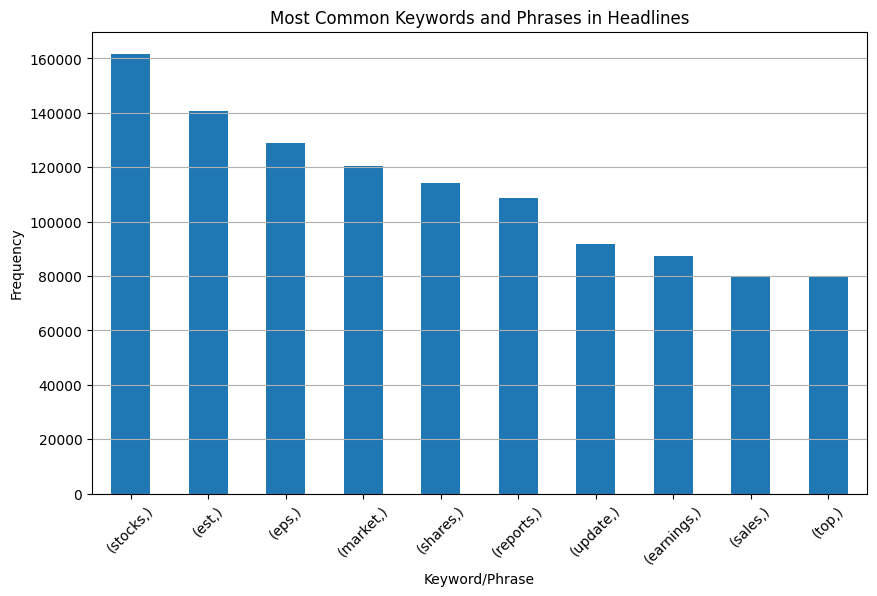

In [10]:
# Print the most common keywords and phrases
print(common_keywords)

# Optionally, plot a bar chart of the most common keywords and phrases
common_keywords.plot(kind='bar', figsize=(10, 6))
plt.title('Most Common Keywords and Phrases in Headlines')
plt.xlabel('Keyword/Phrase')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()